They basically do the same thing (as you noticed) but the difference is that OrdinalEncoder is used to convert the features, while LabelEncoder for the target variable.
OrdinalEncoder in fact can fit multiple columns at the same time while LabelEncoder can only fit a vector of samples, but no one prevents you from preprocessing the columns one at a time with the second one.

we generally use ordinal encoder to encode the independent features, while LabelEncoder is mainly used for encoding the target variable.

After the first attemp, I realized that all of the features provided in mushroomdata set somehow has it own impact on the classification decision.

So in order to test this statement for the second time, I'm gonna use Cross Validation instead of a simple train/test split.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [3]:
mr = pd.read_csv("mushrooms.csv")

In [4]:
mr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mr.shape

(8124, 23)

In [6]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
mr["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

# Prepare inputs

source code: https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [8]:
X = mr.loc[:, mr.columns != 'class']
y = mr.loc[:, mr.columns == 'class']

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
y.head()

,class
0,p
1,e
2,e
3,p
4,e


In [11]:
X = X.astype(str)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [13]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (6499, 22) (6499, 1)
Test (1625, 22) (1625, 1)


In [14]:
def prepare_inputs(X_train,X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc,X_test_enc

def prepare_targets(y_train,y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc,y_test_enc

In [15]:
X_train_enc,X_test_enc = prepare_inputs(X_train,X_test)
y_train_enc,y_test_enc = prepare_targets(y_train,y_test)


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
X_train_enc.shape

(6499, 22)

In [17]:
X_train.shape

(6499, 22)

In [18]:
X_train_enc

array([[5., 0., 4., ..., 2., 0., 1.],
       [5., 2., 3., ..., 2., 3., 1.],
       [5., 3., 2., ..., 7., 4., 0.],
       ...,
       [2., 3., 3., ..., 1., 4., 1.],
       [5., 0., 8., ..., 3., 4., 0.],
       [5., 2., 0., ..., 1., 4., 1.]])

## Perform feature selection with chi-squared as evaluation metric

In [19]:
# Select indicator/metrics to rank and choose features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection: using chisquared indicator
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)


Feature 0: 14.100028
Feature 1: 183.929983
Feature 2: 13.830041
Feature 3: 939.892874
Feature 4: 73.768324
Feature 5: 2.471340
Feature 6: 701.359713
Feature 7: 1282.950367
Feature 8: 4747.903973
Feature 9: 30.456485
Feature 10: 909.203203
Feature 11: 179.667702
Feature 12: 161.587612
Feature 13: 98.871111
Feature 14: 92.051434
Feature 15: nan
Feature 16: 3.751978
Feature 17: 22.045196
Feature 18: 1549.187451
Feature 19: 288.027937
Feature 20: 249.676829
Feature 21: 636.580987


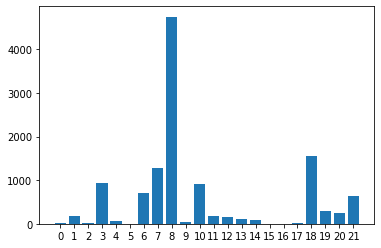

In [20]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(0, 22, step=1))
plt.show()

## Perform feature selection with mutual information as evaluation metric

Feature 0: 0.029249
Feature 1: 0.015289
Feature 2: 0.024275
Feature 3: 0.137727
Feature 4: 0.630798
Feature 5: 0.001865
Feature 6: 0.074965
Feature 7: 0.144186
Feature 8: 0.288060
Feature 9: 0.005899
Feature 10: 0.094333
Feature 11: 0.190725
Feature 12: 0.181646
Feature 13: 0.176126
Feature 14: 0.164275
Feature 15: 0.013636
Feature 16: 0.009055
Feature 17: 0.024541
Feature 18: 0.218170
Feature 19: 0.335744
Feature 20: 0.131081
Feature 21: 0.104644


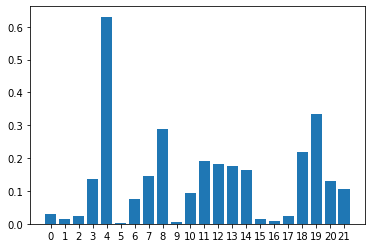

In [21]:
from sklearn.feature_selection import mutual_info_classif

# feature selection: using chisquared indicator
def select_features_mutual_info(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_mutual_info(X_train_enc, y_train_enc, X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(0, 22, step=1))
plt.show()


### A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

#### In this section, we will evaluate a Logistic Regression model with all features compared to a model built from features selected by chi-squared and those features selected via mutual information.

##### 1. Logistic Regression model using all features

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
# fit the model
# model = LogisticRegression(solver='lbfgs')
model = LogisticRegression()
# model = RandomForestClassifier()
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 94.83


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### 2. Logistic Regression model using Chi-Squared features

In [60]:
# feature selection, chi2, 10 best features only
def select_features_4_chi2(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=8)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

X_train_fs_chi2, X_test_fs_chi2 = select_features_4_chi2(X_train_enc, y_train_enc, X_test_enc)

In [61]:
# fit the model
# model = LogisticRegression(solver='lbfgs')
model = LogisticRegression()
# model = RandomForestClassifier()
model.fit(X_train_fs_chi2, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs_chi2)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.82


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In this case, we see that the model achieved an accuracy of about 93.4%, a slight drop in performance.

It is possible that some of the features removed are, in fact, adding value directly or in concert with the selected features.

##### 3. Logistic regression model using Mutual Information Features

In [58]:
# feature selection: using chisquared indicator
def select_features_mutual_info(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=8)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

X_train_fs_mi, X_test_fs_mi = select_features_mutual_info(X_train_enc, y_train_enc, X_test_enc)

In [59]:
# fit the model
# model = LogisticRegression(solver='lbfgs')
model = LogisticRegression()
# model = RandomForestClassifier()
model.fit(X_train_fs_mi, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs_mi)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.11


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In this case, we can see a small lift in classification accuracy to 76%.

To be sure that the effect is real, it would be a good idea to repeat each experiment multiple times and compare the mean performance. It may also be a good idea to explore using k-fold cross-validation instead of a simple train/test split.

### Data Analysis based on 7 selected features from chi-squared

Feature 0: 14.100028
Feature 1: 183.929983
Feature 2: 13.830041
Feature 3: 939.892874
Feature 4: 73.768324
Feature 5: 2.471340
Feature 6: 701.359713
Feature 7: 1282.950367
Feature 8: 4747.903973
Feature 9: 30.456485
Feature 10: 909.203203
Feature 11: 179.667702
Feature 12: 161.587612
Feature 13: 98.871111
Feature 14: 92.051434
Feature 15: nan
Feature 16: 3.751978
Feature 17: 22.045196
Feature 18: 1549.187451
Feature 19: 288.027937
Feature 20: 249.676829
Feature 21: 636.580987


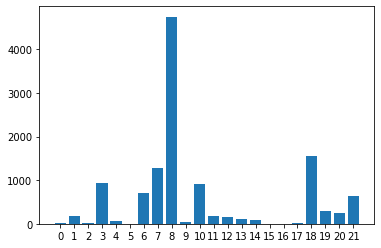

In [62]:
# feature selection: using chisquared indicator
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(0, 22, step=1))
plt.show()


In [63]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [64]:
feature_index = [3,6,7,8,10,18,21]
feature_name = [list(X.columns)[i] for i in feature_index]

In [65]:
feature_name

['bruises',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-root',
 'ring-type',
 'habitat']

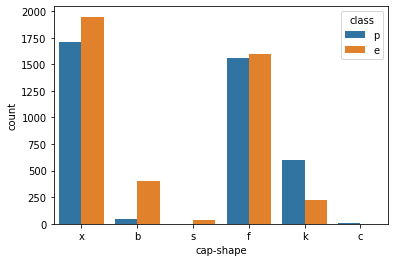

In [83]:
sns.countplot(x = "cap-shape",hue = "class",data = mr)

In [66]:
mushrooms = pd.read_csv("mushrooms.csv")

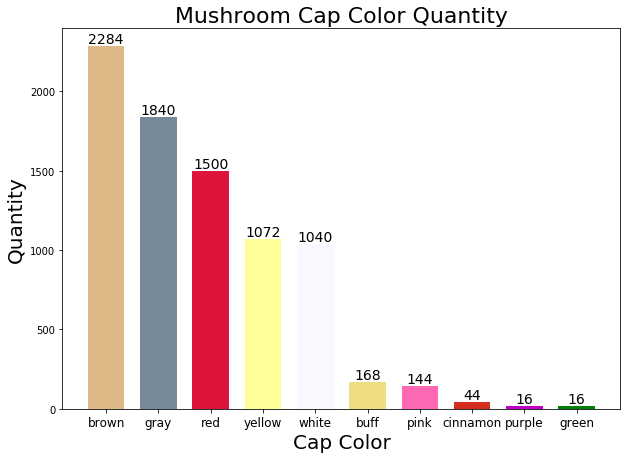

In [70]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 

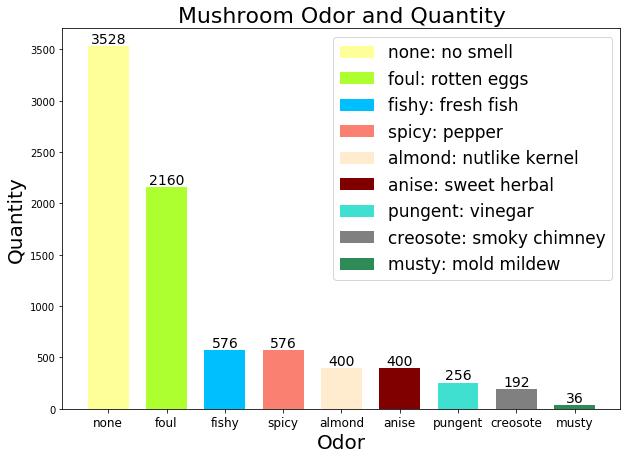

In [71]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odors = mushrooms['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show() #Display bars

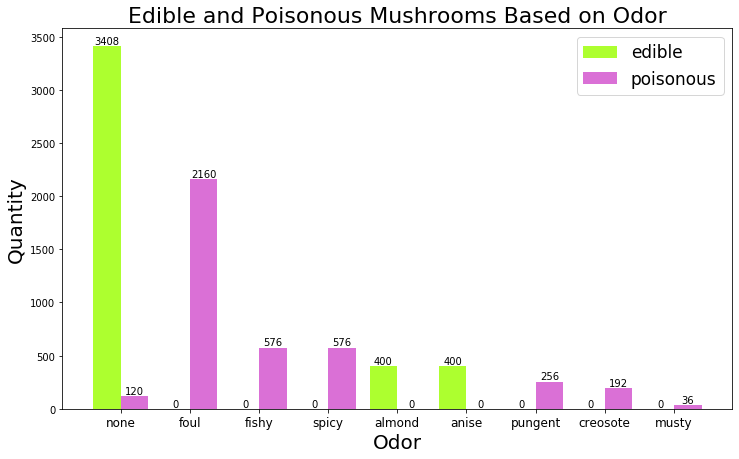

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [72]:
poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(mushrooms[mushrooms['odor'] == odor].index)
    edibles = len(mushrooms[(mushrooms['odor'] == odor) & (mushrooms['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

### Implement Cross Validationn
source: https://www.kaggle.com/dansbecker/cross-validation

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestClassifier())


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:

scores = cross_val_score(my_pipeline,)